In [12]:
import pandas as pd

# path for dataset
csv_path = "heart_disease_dataset.csv"

# load the dataset
df = pd.read_csv(csv_path)


print("Shape:", df.shape)
df.head()


Shape: (3069, 17)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [13]:
# look at column names and first few rows
print("Columns:", df.columns.tolist())
df.head()

# check if there are missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# basic statistics
df.describe()


Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi', 'heart_disease']

Missing values in each column:
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.388074
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.487391
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [14]:
# your dataset has a column 'heart_disease' that says 1 = has disease, 0 = no disease
target_col = "heart_disease"

X = df.drop(columns=[target_col])  # features
y = df[target_col]                 # label

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (3069, 16)
Target shape: (3069,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 2455
Testing samples: 614


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# pipeline = scaling + logistic regression model
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

# train (fit) the model
model.fit(X_train, y_train)

print("Model training complete")


Model training complete


Accuracy : 0.6351791530944625
Precision: 0.5432098765432098
Recall   : 0.3697478991596639
F1-score : 0.44


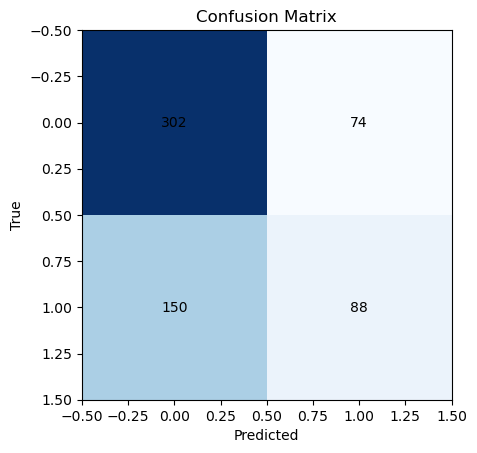

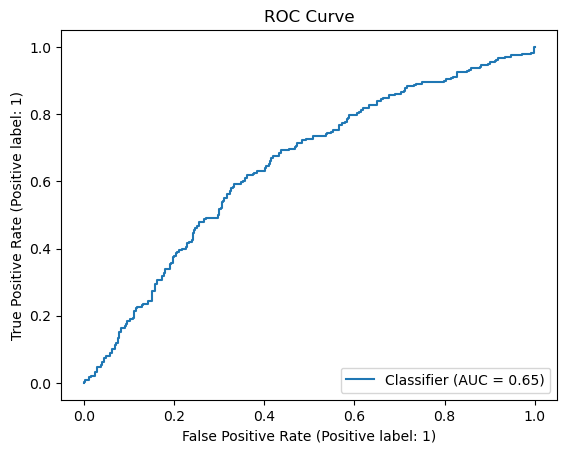

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

# confusion matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.show()

# ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve")
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1-score:", f1_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.6107491856677525
Random Forest F1-score: 0.40987654320987654


In [18]:
from joblib import dump

dump(model, "heart_disease_model.joblib")
print("Model saved as heart_disease_model.joblib")


Model saved as heart_disease_model.joblib


In [19]:
import pandas as pd
from joblib import load

# load the saved model
loaded_model = load("heart_disease_model.joblib")

# example new patient 
new_patient = pd.DataFrame([{
    'age': 55,
    'sex': 1,
    'cp': 2,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 1.2,
    'slope': 2,
    'ca': 0,
    'thal': 3,
    'smoking': 0,
    'diabetes': 0,
    'bmi': 27.5
}])

# predict
prob = loaded_model.predict_proba(new_patient)[:, 1][0]
pred = int(loaded_model.predict(new_patient)[0])

print(f"Predicted probability of heart disease: {prob:.2f}")
print(f"Predicted class (1=disease, 0=no disease): {pred}")


Predicted probability of heart disease: 0.45
Predicted class (1=disease, 0=no disease): 0
